In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
male_data=pd.read_csv("ANSUR_II_MALE_Public.csv",encoding="latin-1",usecols=["weightkg", "stature"])


female_data=pd.read_csv("ANSUR_II_FEMALE_Public.csv",encoding="latin-1",usecols=["weightkg", "stature"])


data = pd.concat([male_data,female_data])
data["weightkg"] /= 10
data["stature"] /= 10

X=np.array([data["weightkg"],data["stature"]]).T

Y_male=np.zeros(len(male_data),dtype=np.int64)
Y_female=np.ones(len(female_data),dtype=np.int64)
Y=np.concatenate([Y_male,Y_female])


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=104,test_size=0.2,shuffle=True)

# def generate_data(n):


#     apple_width=np.random.normal(6,1,n)
#     apple_length=np.random.normal(6,1,n)

#     banana_width=np.random.normal(4,1,n)
#     banana_length=np.random.normal(8,1,n)

#     water_melon_width=np.random.normal(15,1,n)
#     water_melon_length=np.random.normal(15,1,n)

#     width=np.concatenate([apple_width,banana_width,water_melon_width])
#     length=np.concatenate([apple_length,banana_length,water_melon_length])
#     X=np.array([width,length]).T
    

    
#     Y_apple=np.zeros(n,dtype=np.int64)
#     Y_banana=np.ones(n,dtype=np.int64)
#     Y_water_melon=np.ones(n,dtype=np.int64)*2
#     Y=np.concatenate([Y_apple,Y_banana,Y_water_melon])

#     return X,Y


C:\Users\S SM\AppData\Local\Temp\ipykernel_3752\323183615.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


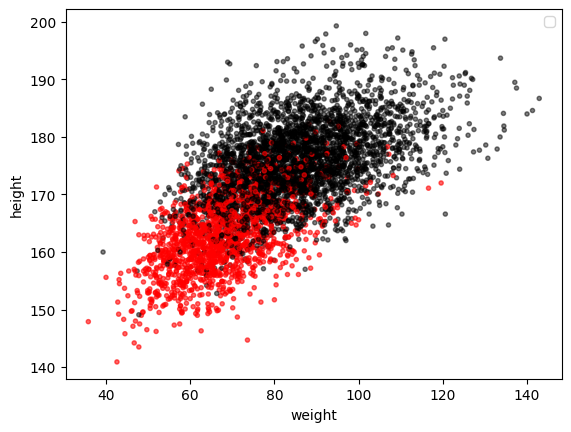

In [38]:

colors=['black','red']
cmap=ListedColormap(colors)

alphamap=Y_train
alphamap=np.where(alphamap==0 ,  0.5 , 0.6)

# lablemap=np.zeros_like(Y_train,np.str_)
# lablemap=np.where(Y_train==0,'man','women' )

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=cmap,marker=".",alpha=alphamap)
# plt.scatter(new_fruit[:],new_fruit[:],c='black',marker="x",s=75)
plt.xlabel("weight")
plt.ylabel("height")
plt.legend()
# left,right=plt.xlim()
# plt.text(right+.5, 11, "the new fruit is probably \n", fontsize = 12, color = 'black')
# plt.text(right+.5, 10.9,fruit, fontsize = 12, color = clr)
plt.show()

In [3]:
from knn import KNN

In [4]:

knn=KNN(3)
knn.fit(X_train,Y_train)
knn.evaluate(X_test,Y_test)


0.8204283360790774

In [5]:
Y_pred=knn.predict(X_test)
confussion_matrix = np.zeros((2,2))
for i in range (len(X_test)):
    if Y_pred[i]==0 and Y_test[i]==0:
        confussion_matrix[0][0] +=1
    elif Y_pred[i]==1 and Y_test[i]==1:
        confussion_matrix[1][1] +=1
    
    elif Y_pred[i]==0 and Y_test[i]==1:
        confussion_matrix[1][0] +=1

    elif Y_pred[i]==1 and Y_test[i]==0:
        confussion_matrix[0][1] +=1

 
confussion_matrix

array([[713.,  95.],
       [123., 283.]])

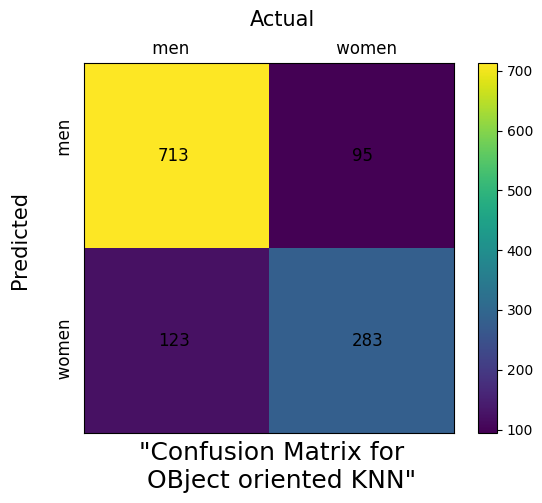

In [168]:
plt.imshow(confussion_matrix)
plt.text(-.2, 1.8, '"Confusion Matrix for \n OBject oriented KNN"', fontsize = 18)

plt.text(.4, -.7, 'Actual', fontsize = 15)
plt.text(-.9, .7, 'Predicted', fontsize = 15,rotation=90)

plt.text(-.5, -.55, '             men                            women', fontsize = 12)
plt.text(-.65, 1.5, '           women                               men', fontsize = 12,rotation=90)

plt.text(-.1, 0.03, '713', fontsize = 12)
plt.text(.95, 0.03, '95', fontsize = 12,)
plt.text(-.1, 1.03, '123', fontsize = 12)
plt.text(.95, 1.03, '283', fontsize = 12,)

plt.xticks([])
plt.yticks([])
plt.colorbar() 

In [114]:
from  sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)


0.8204283360790774

In [115]:
Y_pred=knn.predict(X_test)
confussion_matrix = np.zeros((2,2))
for i in range (len(X_test)):
    if Y_pred[i]==0 and Y_test[i]==0:
        confussion_matrix[0][0] +=1
    elif Y_pred[i]==1 and Y_test[i]==1:
        confussion_matrix[1][1] +=1
    
    elif Y_pred[i]==0 and Y_test[i]==1:
        confussion_matrix[1][0] +=1

    elif Y_pred[i]==1 and Y_test[i]==0:
        confussion_matrix[0][1] +=1

 
confussion_matrix

array([[713.,  95.],
       [123., 283.]])

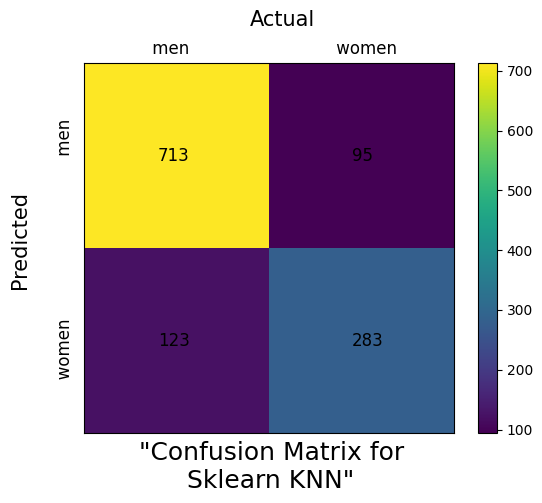

In [167]:
plt.imshow(confussion_matrix)
plt.text(-.2, 1.8, '"Confusion Matrix for \n      Sklearn KNN"', fontsize = 18)

plt.text(.4, -.7, 'Actual', fontsize = 15)
plt.text(-.9, .7, 'Predicted', fontsize = 15,rotation=90)

plt.text(-.5, -.55, '             men                            women', fontsize = 12)
plt.text(-.65, 1.5, '           women                               men', fontsize = 12,rotation=90)


plt.text(-.1, 0.03, '713', fontsize = 12)
plt.text(.95, 0.03, '95', fontsize = 12,)
plt.text(-.1, 1.03, '123', fontsize = 12)
plt.text(.95, 1.03, '283', fontsize = 12,)

plt.xticks([])
plt.yticks([])
plt.colorbar() 

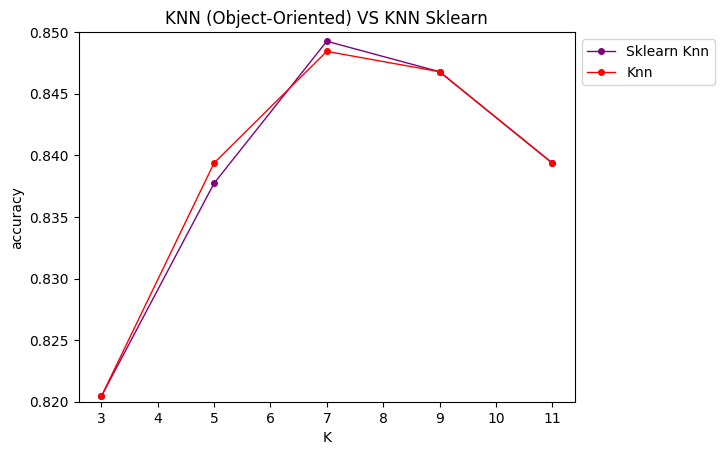

In [147]:
import matplotlib.pyplot as plt

# line 1 points
x1 = [3,5,7,9,11]
y1 = [0.8204283360790774,0.8377265238879736,0.8492586490939045,0.8467874794069192,0.8393739703459637]
# plotting the line 1 points 
plt.plot(x1, y1,c='purple', label = "Sklearn Knn",linewidth=1, marker='.', markerfacecolor='purple', markersize=8)

# line 2 points
x2 = [3,5,7,9,11]
y2 = [0.8204283360790774,0.8393739703459637,0.8484349258649094,0.8467874794069192,0.8393739703459637]
# plotting the line 2 points 
plt.plot(x2, y2,c='red' ,label = "Knn",linewidth=1, marker='.', markerfacecolor='red', markersize=8)
n=np.arange(0,1,0.01)
plt.ylim(0.82,0.85)
# naming the x axis
plt.xlabel('K')
# naming the y axis
plt.ylabel('accuracy')
# giving a title to my graph
plt.title('KNN (Object-Oriented) VS KNN Sklearn')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# function to show the plot
plt.show()